In [17]:
# load a csv
import pandas as pd
df_0 = pd.read_csv('landmarks.csv')
df_0.head()

,Timestamp,Landmark_0_x,Landmark_1_x,Landmark_2_x,Landmark_3_x,Landmark_4_x,Landmark_5_x,Landmark_6_x,Landmark_7_x,Landmark_8_x,...,Landmark_458_y,Landmark_459_y,Landmark_460_y,Landmark_461_y,Landmark_462_y,Landmark_463_y,Landmark_464_y,Landmark_465_y,Landmark_466_y,Landmark_467_y
0,0.274265,0.507039,0.794486,0.506762,0.744800,0.506112,0.758818,0.496498,0.693569,0.506552,...,0.528411,0.650959,0.522917,0.654753,0.520200,0.657593,0.576316,0.640852,0.581192,0.635042
1,0.315291,0.507546,0.793536,0.507126,0.742338,0.506828,0.757252,0.497324,0.692396,0.506945,...,0.530170,0.651527,0.524580,0.655135,0.521806,0.657805,0.578613,0.641950,0.583569,0.636167
2,0.331957,0.507860,0.794064,0.507244,0.742645,0.506958,0.757468,0.497176,0.692393,0.507003,...,0.530043,0.651031,0.524445,0.654726,0.521669,0.657423,0.578823,0.640373,0.583757,0.634939
3,0.345061,0.507767,0.794544,0.507126,0.742963,0.506911,0.757774,0.497226,0.692661,0.506891,...,0.529924,0.650856,0.524367,0.654631,0.521634,0.657410,0.578451,0.640131,0.583342,0.634797
4,0.365117,0.508294,0.793942,0.507994,0.742449,0.507594,0.757409,0.498072,0.692130,0.507811,...,0.530637,0.651083,0.525059,0.654714,0.522328,0.657372,0.579076,0.640805,0.583962,0.635487


In [18]:
import numpy as np

def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def avg_position(df, landmark_indices):
    x_coords = [df[f'Landmark_{i}_x'] for i in landmark_indices]
    y_coords = [df[f'Landmark_{i}_y'] for i in landmark_indices]
    return pd.DataFrame({'x': sum(x_coords) / len(x_coords), 'y': sum(y_coords) / len(y_coords)})

def calculate_features(df):
    result_df = pd.DataFrame()
    
    result_df['Timestamp'] = df['Timestamp']
    
    nose_tip = df[['Landmark_1_x', 'Landmark_1_y']]
    
    result_df['head_x_change'] = nose_tip['Landmark_1_x'].diff()
    result_df['head_y_change'] = nose_tip['Landmark_1_y'].diff()
    
    result_df['left_eye_height'] = distance(df['Landmark_386_x'], df['Landmark_386_y'], df['Landmark_374_x'], df['Landmark_374_y'])
    result_df['right_eye_height'] = distance(df['Landmark_159_x'], df['Landmark_159_y'], df['Landmark_145_x'], df['Landmark_145_y'])
    
    result_df['mouth_openness'] = distance(df['Landmark_13_x'], df['Landmark_13_y'], df['Landmark_14_x'], df['Landmark_14_y'])
    
    top_lip = df['Landmark_0_y']
    result_df['left_smile'] = df['Landmark_61_y'] - top_lip
    result_df['right_smile'] = df['Landmark_291_y'] - top_lip
    
    result_df['left_eyebrow_raised'] = df['Landmark_282_y'] - df['Landmark_386_y']
    result_df['right_eyebrow_raised'] = df['Landmark_52_y'] - df['Landmark_159_y']
    
    result_df['left_cheek_puff'] = df['Landmark_447_x'] - df['Landmark_61_x']
    result_df['right_cheek_puff'] = df['Landmark_291_x'] - df['Landmark_227_x']
    
    result_df['nose_scrunch'] = distance(df['Landmark_6_x'], df['Landmark_6_y'], df['Landmark_4_x'], df['Landmark_4_y'])
    
    return result_df

result_df = calculate_features(df_0)

result_df.to_csv('facial_features.csv', index=False)

print("Feature engineering complete. Results saved to 'facial_features.csv'.")

Feature engineering complete. Results saved to 'facial_features.csv'.


In [19]:
print(len(result_df))
result_df.head()

569


,Timestamp,head_x_change,head_y_change,left_eye_height,right_eye_height,mouth_openness,left_smile,right_smile,left_eyebrow_raised,right_eyebrow_raised,left_cheek_puff,right_cheek_puff,nose_scrunch
0,0.274265,NaN,NaN,0.090401,0.068010,0.342549,0.265228,0.472670,-0.034446,-0.267154,-0.016668,0.020110,0.009992
1,0.315291,-0.000950,-0.000557,0.091229,0.068353,0.339315,0.264940,0.471152,-0.034315,-0.265140,-0.016899,0.020688,0.009803
2,0.331957,0.000528,0.000235,0.091696,0.069004,0.339890,0.264729,0.471640,-0.034301,-0.265213,-0.016652,0.020497,0.010101
3,0.345061,0.000480,-0.000942,0.090989,0.068930,0.339678,0.263247,0.470261,-0.033557,-0.265535,-0.016414,0.020386,0.009968
4,0.365117,-0.000602,0.000284,0.091569,0.068614,0.338374,0.265076,0.472705,-0.034295,-0.264889,-0.016525,0.020811,0.009837


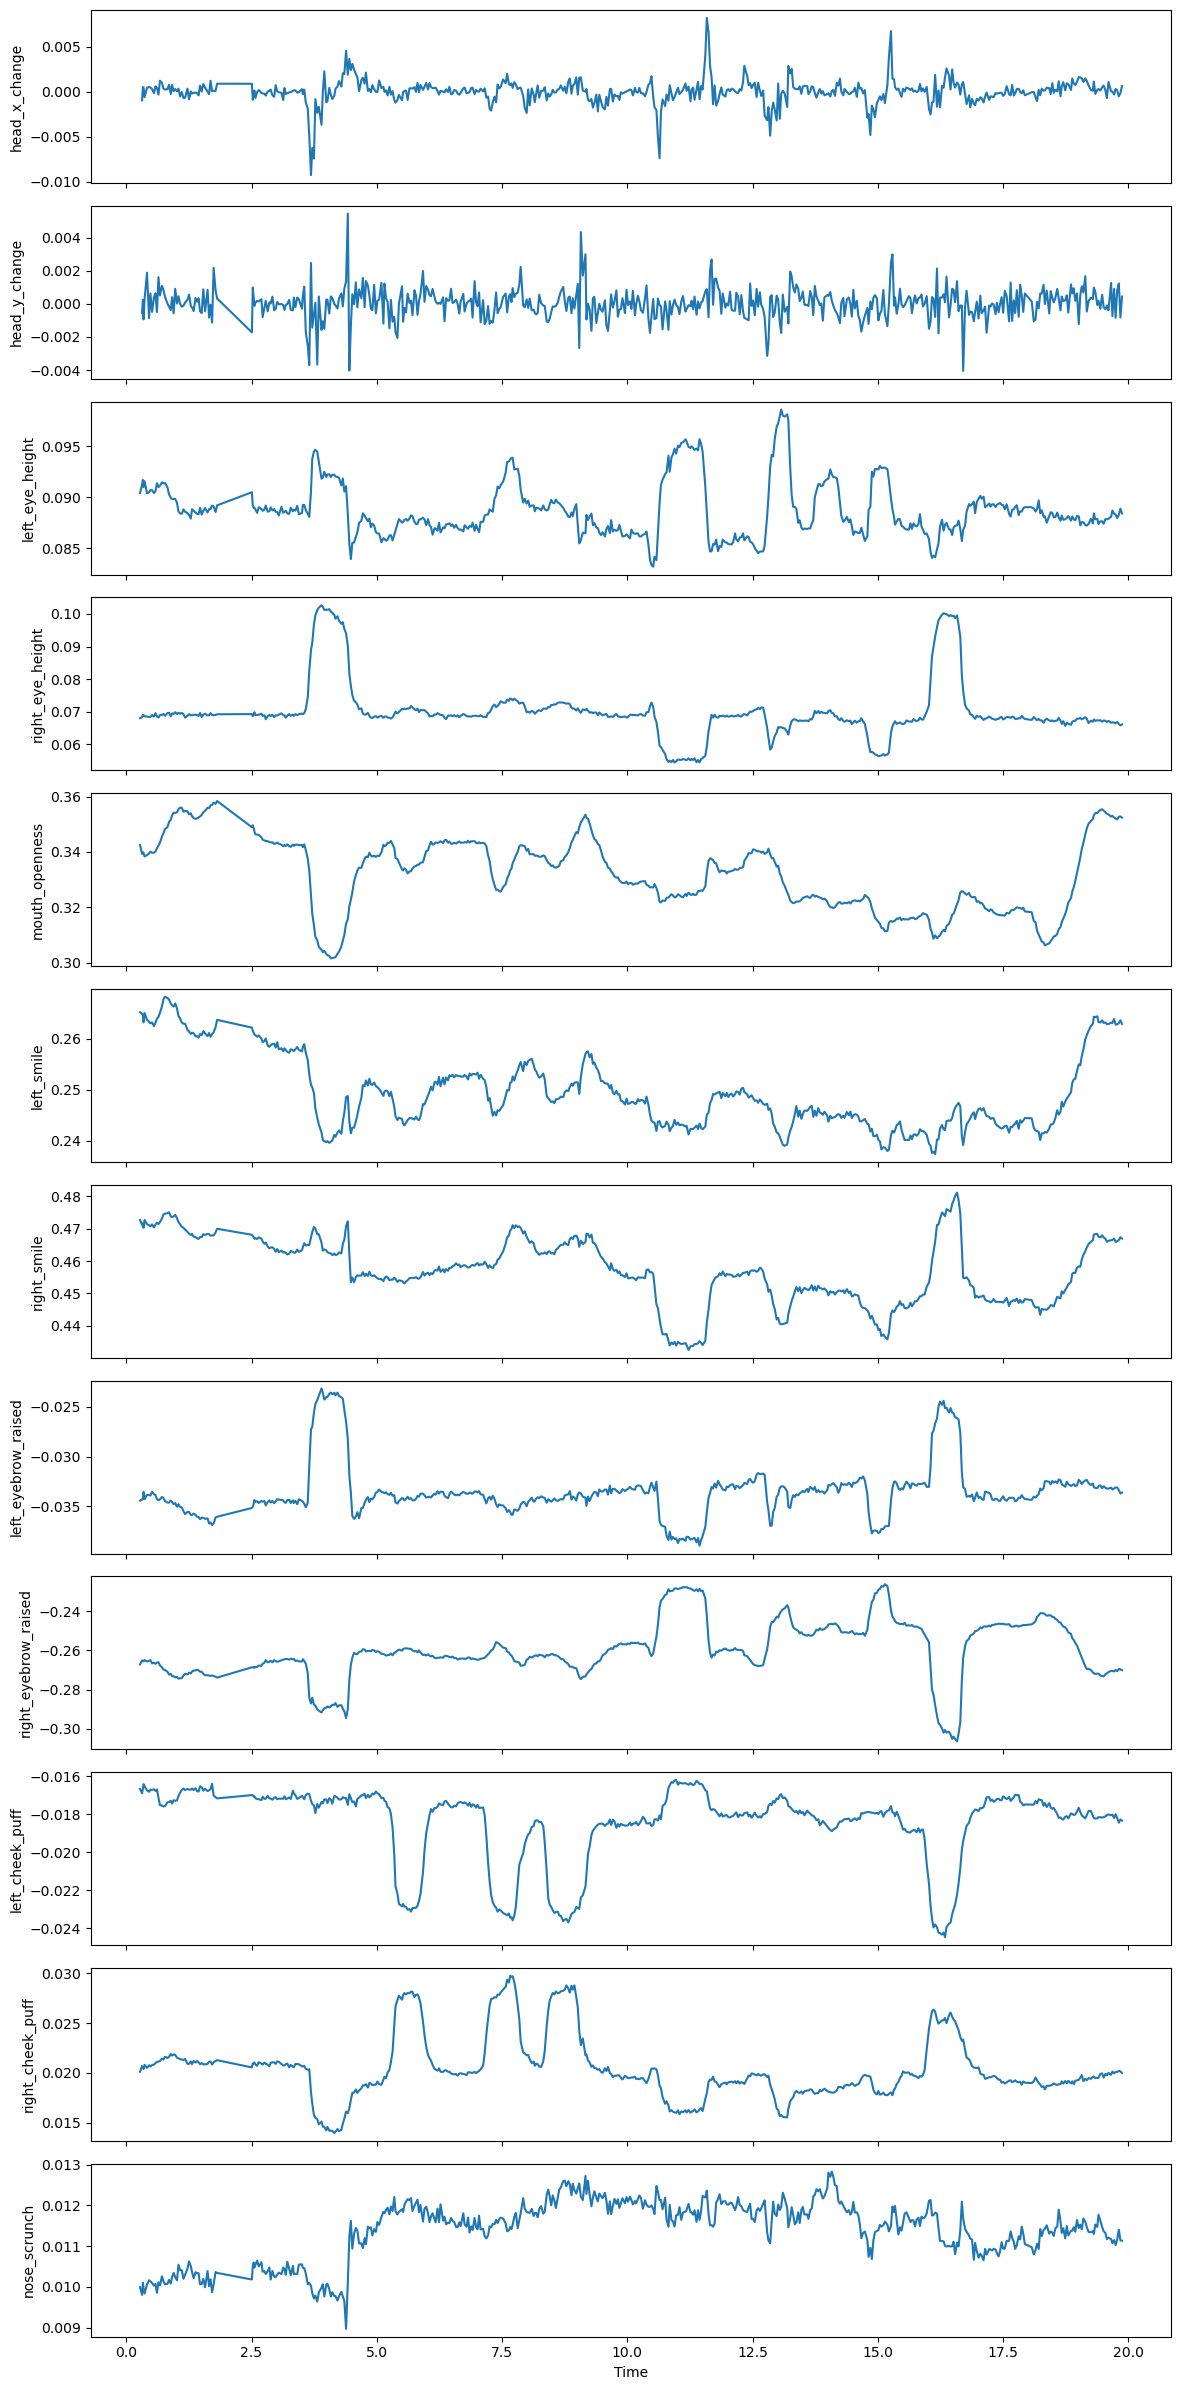

In [20]:
import matplotlib.pyplot as plt

features = [col for col in result_df.columns if col != 'Timestamp']
n_features = len(features)

fig, axs = plt.subplots(n_features, 1, figsize=(12, 2*n_features), sharex=True)

for i, feature in enumerate(features):
    axs[i].plot(result_df['Timestamp'], result_df[feature])
    axs[i].set_ylabel(feature)

axs[-1].set_xlabel('Time')


plt.tight_layout()
plt.show()

In [21]:
def generate_attention_df(result_df):
    attention_df = pd.DataFrame({'Timestamp': result_df['Timestamp']})
    
    left_eye_threshold = result_df['left_eye_height'].quantile(0.5)
    right_eye_threshold = result_df['right_eye_height'].quantile(0.5)
    left_eyebrow_threshold = result_df['left_eyebrow_raised'].quantile(0.5)
    right_eyebrow_threshold = result_df['right_eyebrow_raised'].quantile(0.5)
    
    attention_df['attention'] = np.where(
        (result_df['left_eye_height'] > left_eye_threshold) &
        (result_df['right_eye_height'] > right_eye_threshold) &
        ((result_df['left_eyebrow_raised'] > left_eyebrow_threshold) |
         (result_df['right_eyebrow_raised'] > right_eyebrow_threshold)),
        1, 0
    )
    
    return attention_df

attention_df = generate_attention_df(result_df)
attention_df.head()

,Timestamp,attention
0,0.274265,0
1,0.315291,0
2,0.331957,0
3,0.345061,1
4,0.365117,0


In [22]:
attention_df['attention'].value_counts()

attention
0    514
1     55
Name: count, dtype: int64

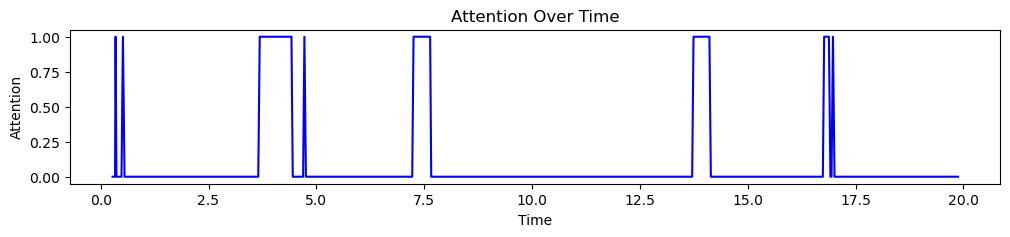

In [23]:
plt.figure(figsize=(12, 2))
plt.plot(attention_df['Timestamp'], attention_df['attention'], color='blue')
plt.title('Attention Over Time')
plt.xlabel('Time')
plt.ylabel('Attention')
plt.show()